In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import ListedColormap

import os
root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

In [2]:
gdf = gpd.read_file(root + '/data/shapefiles/ForestArea_Damagundam.shp')
totalarea = gdf['AREA_KM2'].sum()*100

In [4]:
# Path to your raster file (TIFF)
raster_file = root + '/data/fcd_tifs/FCD_2023.tif'
# Open the raster file
with rasterio.open(raster_file) as src:
    # Read the first band
    band1_2023 = src.read(1)

# Path to your raster file (TIFF)
raster_file = root + '/data/fcd_tifs/FCD_2019.tif'
# Open the raster file
with rasterio.open(raster_file) as src:
    # Read the first band
    band1_2019 = src.read(1)


# Path to your raster file (TIFF)
raster_file = root + '/data/fcd_tifs/FCD_2014.tif'
# Open the raster file
with rasterio.open(raster_file) as src:
    # Read the first band
    band1_2014 = src.read(1)

In [5]:
bins =  [0, 0.1, 0.4, 0.7, 1]

In [6]:
clean_data = band1_2023[~np.isnan(band1_2023)]
# Use np.histogram to count the values in each bin
counts, _ = np.histogram(clean_data, bins=bins)

# Calculate the total number of non-NaN elements
total_non_nan = len(clean_data)

# Calculate the percentage for each bin
percentages_2023 = (counts / total_non_nan) * 100
areas2023 = percentages_2023 * 100 * totalarea

In [7]:
clean_data = band1_2019[~np.isnan(band1_2019)]
# Use np.histogram to count the values in each bin
counts, _ = np.histogram(clean_data, bins=bins)

# Calculate the total number of non-NaN elements
total_non_nan = len(clean_data)

# Calculate the percentage for each bin
percentages_2019 = (counts / total_non_nan) * 100
areas2019 = percentages_2019 * 100 * totalarea

In [8]:
clean_data = band1_2014[~np.isnan(band1_2014)]
# Use np.histogram to count the values in each bin
counts, _ = np.histogram(clean_data, bins=bins)

# Calculate the total number of non-NaN elements
total_non_nan = len(clean_data)

# Calculate the percentage for each bin
percentages_2014 = (counts / total_non_nan) * 100
areas2014 = percentages_2014 * 100 * totalarea

In [9]:
df = pd.DataFrame([areas2014,areas2019,areas2023])
df.columns = ['Scrub', 'Open', 'Dense', 'Very Dense']
df['year'] = [2014, 2019, 2023]
df = df.set_index('year')
df = df/100000

In [10]:
df = pd.DataFrame([percentages_2014,percentages_2019,percentages_2023])
df.columns = ['Scrub', 'Open', 'Dense', 'Very Dense']
df['year'] = [2014, 2019, 2023]
df

,Scrub,Open,Dense,Very Dense,year
0,16.439063,83.553192,0.0,0.0,2014
1,45.321011,54.676408,0.0,0.0,2019
2,37.566151,62.428686,0.0,0.0,2023


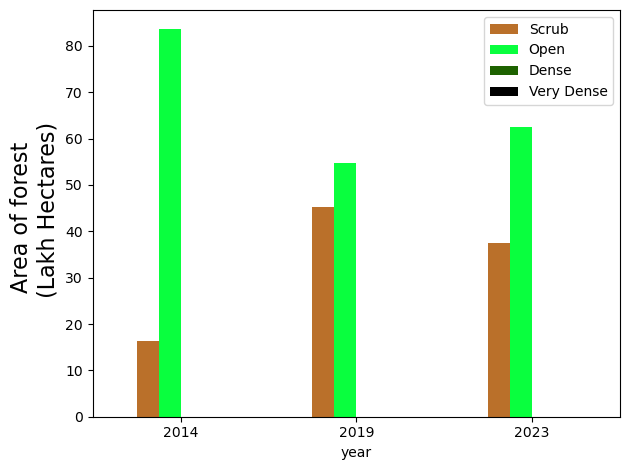

In [19]:
df.set_index('year').plot.bar(rot=0, color=['#ba702a', '#09ff3e', '#1d6200','black'])
plt.ylabel("Area of forest \n (Lakh Hectares)", fontsize=16)
plt.tight_layout()
plt.savefig(root + '/results/ForestTypes_3snaps.png')

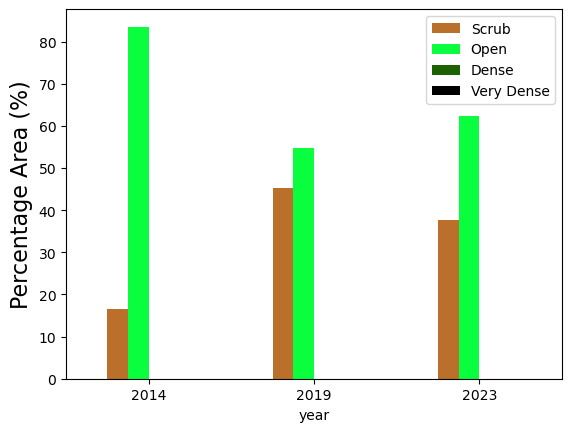

In [20]:
df.set_index('year').plot.bar(rot=0, color=['#ba702a', '#09ff3e', '#1d6200','black'])
plt.ylabel("Percentage Area (%)", fontsize=16)
plt.show()

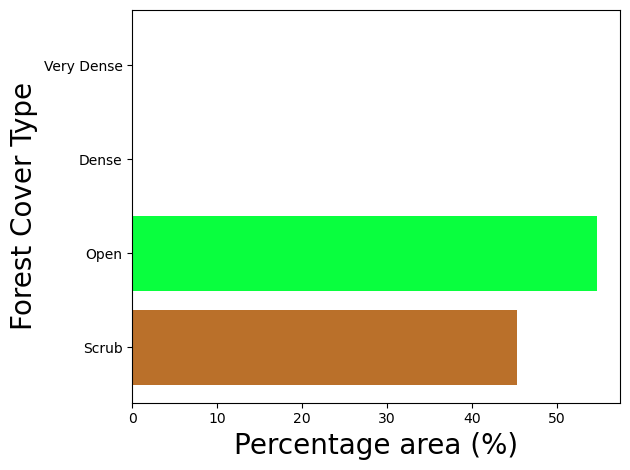

In [44]:
plt.barh(y=['Scrub','Open','Dense','Very Dense'] , width=percentages_2014, color=['#ba702a', '#09ff3e', '#1d6200','black'])
plt.xlabel('Percentage area (%)', fontsize=20)
plt.ylabel('Forest Cover Type', fontsize=20)
plt.tight_layout()
plt.savefig('ForestType2019.png')

In [13]:
df

,Scrub,Open,Dense,Very Dense,year
0,16.439063,83.553192,0.0,0.0,2014
1,45.321011,54.676408,0.0,0.0,2019
2,37.566151,62.428686,0.0,0.0,2023


In [16]:
areas2014/100000


array([ 52.67404704, 267.72113793,   0.        ,   0.        ])